# Clasificador Naive Bayes


Analizando dataset Healthcare...

Dataset: Healthcare
Muestreando dataset de 55500 a 5000 muestras...
Número de muestras para Hold-Out y CV: 5000

Resultados Hold-Out (70/30):
Accuracy: 0.3460
Matriz de confusión:
[[171 194 139]
 [171 184 141]
 [166 170 164]]

Resultados 10-Fold Cross-Validation:
Accuracy promedio: 0.3382
Muestreando dataset de 55500 a 1000 muestras...

Número de muestras para LOO: 1000

Resultados Leave-One-Out:
Accuracy: 0.3490


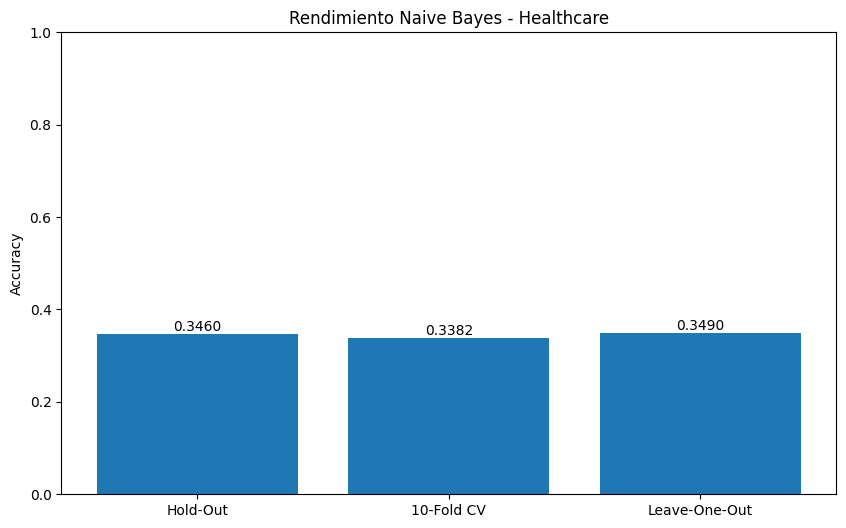


Resumen de resultados para Healthcare:
Hold-Out Accuracy: 0.3460
10-Fold CV Accuracy: 0.3382
Leave-One-Out Accuracy: 0.3490

Analizando dataset Bank...

Dataset: Bank
Muestreando dataset de 45211 a 5000 muestras...
Número de muestras para Hold-Out y CV: 5000

Resultados Hold-Out (70/30):
Accuracy: 0.8273
Matriz de confusión:
[[1139  186]
 [  73  102]]

Resultados 10-Fold Cross-Validation:
Accuracy promedio: 0.8334
Muestreando dataset de 45211 a 1000 muestras...

Número de muestras para LOO: 1000

Resultados Leave-One-Out:
Accuracy: 0.8050


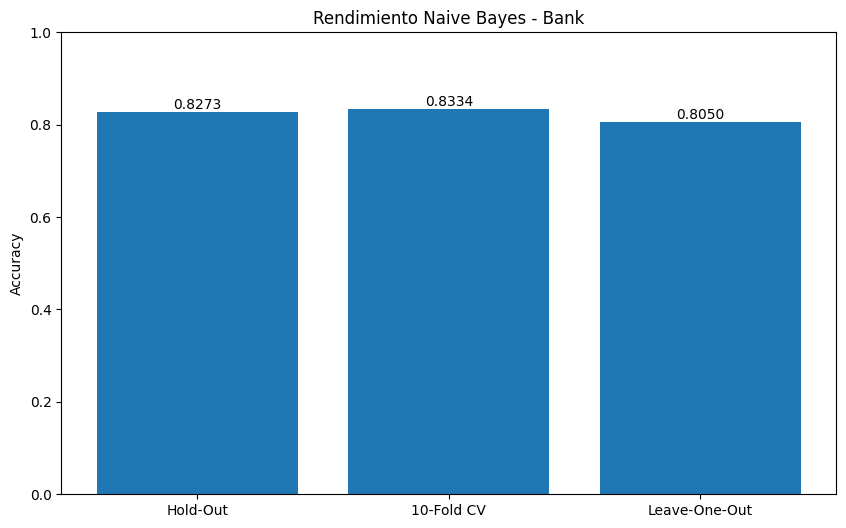


Resumen de resultados para Bank:
Hold-Out Accuracy: 0.8273
10-Fold CV Accuracy: 0.8334
Leave-One-Out Accuracy: 0.8050

Analizando dataset Credit Card...

Dataset: Credit Card
Muestreando dataset de 30000 a 5000 muestras...
Número de muestras para Hold-Out y CV: 5000

Resultados Hold-Out (70/30):
Accuracy: 0.7553
Matriz de confusión:
[[945 223]
 [144 188]]

Resultados 10-Fold Cross-Validation:
Accuracy promedio: 0.5692
Muestreando dataset de 30000 a 1000 muestras...

Número de muestras para LOO: 1000

Resultados Leave-One-Out:
Accuracy: 0.6010


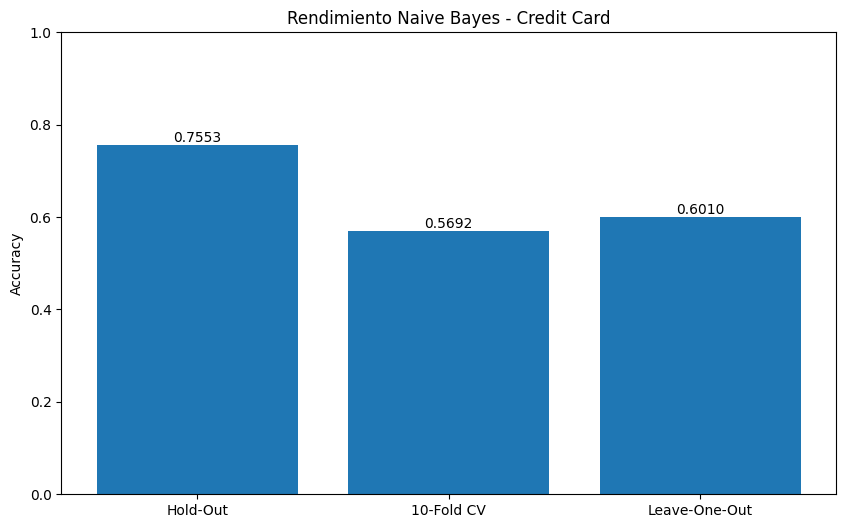


Resumen de resultados para Credit Card:
Hold-Out Accuracy: 0.7553
10-Fold CV Accuracy: 0.5692
Leave-One-Out Accuracy: 0.6010


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, LeaveOneOut
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def sample_data(X, y, max_samples=5000, for_loo=False):
    """
    Muestrea los datos si exceden el número máximo de muestras.
    Mantiene la estratificación de las clases.
    """
    limit = 1000 if for_loo else max_samples

    if len(X) > limit:
        print(f"Muestreando dataset de {len(X)} a {limit} muestras...")
        X_sampled, _, y_sampled, _ = train_test_split(
            X, y,
            train_size=limit,
            stratify=y,
            random_state=42
        )
        return X_sampled, y_sampled.reset_index(drop=True)
    return X.reset_index(drop=True), y.reset_index(drop=True)

def prepare_healthcare_data():
    # Cargar dataset de healthcare
    df = pd.read_csv("Dataset\\healthcare_dataset.csv")
    
    # Preprocesar variables categóricas
    le = LabelEncoder()
    df['Gender'] = le.fit_transform(df['Gender'])
    df['Blood Type'] = le.fit_transform(df['Blood Type'])
    df['Medical Condition'] = le.fit_transform(df['Medical Condition'])
    df['Test Results'] = le.fit_transform(df['Test Results'])
    
    # Seleccionar features relevantes
    X = df[['Age', 'Gender', 'Blood Type', 'Medical Condition']]
    y = df['Test Results']
    
    return X, y

def prepare_bank_data():
    # Cargar dataset del banco
    df = pd.read_csv("Dataset\\bank_full.csv", sep=";")
    
    # Preprocesar variables categóricas
    categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
    le = LabelEncoder()
    for col in categorical_columns:
        df[col] = le.fit_transform(df[col])
    
    # Convertir variable objetivo
    df['y'] = (df['y'] == 'yes').astype(int)
    
    # Seleccionar features
    X = df.drop('y', axis=1)
    y = df['y']
    
    return X, y

def prepare_credit_data():
    # Cargar dataset de tarjetas de crédito
    df = pd.read_csv("Dataset\\default_credit_card_clients.csv")
    
    # Seleccionar features relevantes
    X = df.drop(['ID', 'default payment next month'], axis=1)
    y = df['default payment next month']
    
    return X, y

def evaluate_naive_bayes(X, y, dataset_name):
    print(f"\nDataset: {dataset_name}")

    # Muestrear datos para el análisis general
    X_sampled, y_sampled = sample_data(X, y)
    print(f"Número de muestras para Hold-Out y CV: {len(X_sampled)}")

    # Escalar features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_sampled)
    
    # 1. Hold-Out 70/30 estratificado
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y_sampled, test_size=0.3, stratify=y_sampled, random_state=42
    )
    
    # Entrenamiento y evaluación con Hold-Out
    nb = GaussianNB()
    nb.fit(X_train, y_train)
    holdout_score = nb.score(X_test, y_test)
    print("\nResultados Hold-Out (70/30):")
    print(f"Accuracy: {holdout_score:.4f}")
    
    # Matriz de confusión
    y_pred = nb.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print("Matriz de confusión:")
    print(cm)
    
    # 2. 10-Fold Cross-Validation estratificado
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    cv_scores = []

    print("\nResultados 10-Fold Cross-Validation:")
    for train_index, val_index in skf.split(X_scaled, y_sampled):
        X_train_fold = X_scaled[train_index]
        X_val_fold = X_scaled[val_index]
        y_train_fold = y_sampled.iloc[train_index]
        y_val_fold = y_sampled.iloc[val_index]

        nb = GaussianNB()
        nb.fit(X_train_fold, y_train_fold)
        score = nb.score(X_val_fold, y_val_fold)
        cv_scores.append(score)

    cv_mean_score = np.mean(cv_scores)
    print(f"Accuracy promedio: {cv_mean_score:.4f}")

    # 3. Leave-One-Out
    X_loo, y_loo = sample_data(X, y, for_loo=True)
    X_loo_scaled = scaler.fit_transform(X_loo)
    print(f"\nNúmero de muestras para LOO: {len(X_loo)}")

    print("\nResultados Leave-One-Out:")
    loo = LeaveOneOut()
    loo_scores = []

    for train_index, test_index in loo.split(X_loo_scaled):
        X_train_loo = X_loo_scaled[train_index]
        X_test_loo = X_loo_scaled[test_index]
        y_train_loo = y_loo.iloc[train_index]
        y_test_loo = y_loo.iloc[test_index]

        nb = GaussianNB()
        nb.fit(X_train_loo, y_train_loo)
        score = nb.score(X_test_loo, y_test_loo)
        loo_scores.append(score)

    loo_mean_score = np.mean(loo_scores)
    print(f"Accuracy: {loo_mean_score:.4f}")
    
    # Visualizar resultados
    plt.figure(figsize=(10, 6))
    methods = ['Hold-Out', '10-Fold CV', 'Leave-One-Out']
    scores = [holdout_score, cv_mean_score, loo_mean_score]
    
    plt.bar(methods, scores)
    plt.ylabel('Accuracy')
    plt.title(f'Rendimiento Naive Bayes - {dataset_name}')
    plt.ylim(0, 1)
    for i, score in enumerate(scores):
        plt.text(i, score, f'{score:.4f}', ha='center', va='bottom')
    plt.show()
    
    print(f"\nResumen de resultados para {dataset_name}:")
    print(f"Hold-Out Accuracy: {holdout_score:.4f}")
    print(f"10-Fold CV Accuracy: {cv_mean_score:.4f}")
    print(f"Leave-One-Out Accuracy: {loo_mean_score:.4f}")
    
    return holdout_score, cv_mean_score, loo_mean_score

# Ejecutar análisis para cada dataset
datasets = [
    (prepare_healthcare_data(), 'Healthcare'),
    (prepare_bank_data(), 'Bank'),
    (prepare_credit_data(), 'Credit Card')
]

for (X, y), name in datasets:
    print(f"\nAnalizando dataset {name}...")
    evaluate_naive_bayes(X, y, name)